Imports

In [177]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, f1_score
from pickle import dump

Import Dataset

In [178]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv")
df

,package_name,review,polarity
0,com.facebook.katana,privacy at least put some option appear offli...,0
1,com.facebook.katana,"messenger issues ever since the last update, ...",0
2,com.facebook.katana,profile any time my wife or anybody has more ...,0
3,com.facebook.katana,the new features suck for those of us who don...,0
4,com.facebook.katana,forced reload on uploading pic on replying co...,0
...,...,...,...
886,com.rovio.angrybirds,loved it i loooooooooooooovvved it because it...,1
887,com.rovio.angrybirds,all time legendary game the birthday party le...,1
888,com.rovio.angrybirds,ads are way to heavy listen to the bad review...,0
889,com.rovio.angrybirds,fun works perfectly well. ads aren't as annoy...,1


EDA

In [179]:
df.shape

(891, 3)

In [180]:
df.head()

,package_name,review,polarity
0,com.facebook.katana,privacy at least put some option appear offli...,0
1,com.facebook.katana,"messenger issues ever since the last update, ...",0
2,com.facebook.katana,profile any time my wife or anybody has more ...,0
3,com.facebook.katana,the new features suck for those of us who don...,0
4,com.facebook.katana,forced reload on uploading pic on replying co...,0


In [181]:
df.isnull().sum()

package_name    0
review          0
polarity        0
dtype: int64

In [182]:
df.describe()

,polarity
count,891.000000
mean,0.344557
std,0.475490
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


Removing spaces

In [183]:
df.drop("package_name", axis = 1, inplace = True)
df

,review,polarity
0,privacy at least put some option appear offli...,0
1,"messenger issues ever since the last update, ...",0
2,profile any time my wife or anybody has more ...,0
3,the new features suck for those of us who don...,0
4,forced reload on uploading pic on replying co...,0
...,...,...
886,loved it i loooooooooooooovvved it because it...,1
887,all time legendary game the birthday party le...,1
888,ads are way to heavy listen to the bad review...,0
889,fun works perfectly well. ads aren't as annoy...,1


Converting text to lowercase

In [184]:
df["review"] = df["review"].str.strip().str.lower()

# Training and split

In [185]:
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['polarity'], test_size=0.2, random_state=42)
X_train.head()

331    just did the latest update on viber and yet ag...
733    keeps crashing it only works well in extreme d...
382    the fail boat has arrived the 6.0 version is t...
704    superfast, just as i remember it ! opera mini ...
813    installed and immediately deleted this crap i ...
Name: review, dtype: object

# MultinomialNB Model
with TfidfVectorizer

In [186]:
tfidf_model = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_model.fit_transform(X_train)
X_test_tfidf = tfidf_model.transform(X_test)

nb_model = MultinomialNB()
params = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 2.0],  
    'fit_prior': [True, False]
}

In [187]:
GridSearch_CV = GridSearchCV(nb_model, params, cv=5, scoring='f1_weighted')
GridSearch_CV.fit(X_train_tfidf, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 2.0],
                         'fit_prior': [True, False]},
             scoring='f1_weighted')

Predictions

In [188]:
y_pred_NB__tfidf = GridSearch_CV.best_estimator_.predict(X_test_tfidf)

best_parameters = GridSearch_CV.best_params_
best_score_accuracy_multi_tfidf = GridSearch_CV.best_score_
f1 = f1_score(y_test, y_pred_NB__tfidf, average='weighted')
report = classification_report(y_test, y_pred_NB__tfidf)

print("Result best parameters and accuracy for MultinomialNB using TfidfVectorizer:")
print(f"Parameters:",best_parameters)
print(f"Accuracy: {best_score_accuracy_multi_tfidf:.2f}")
print(f"MultinomialNB F1 Score (Weighted): {f1:.2f}")
print(f"Classification Report:", report)
dump(nb_model, open("/Users/nandapop/Documents/Bootcamp/naive_bayes/data/processed/naive_bayes_MultinomialNB_Tfidf_GridSearchCV.sav", "wb"))

Result best parameters and accuracy for MultinomialNB using TfidfVectorizer:
Parameters: {'alpha': 1.0, 'fit_prior': False}
Accuracy: 0.81
MultinomialNB F1 Score (Weighted): 0.82
Classification Report:               precision    recall  f1-score   support

           0       0.85      0.92      0.88       126
           1       0.76      0.60      0.67        53

    accuracy                           0.83       179
   macro avg       0.80      0.76      0.78       179
weighted avg       0.82      0.83      0.82       179



# MultinomialNB Model
with CountVectorizer

In [189]:
vec_model = CountVectorizer(stop_words = "english")
X_train = vec_model.fit_transform(X_train).toarray()
X_test = vec_model.transform(X_test).toarray()

In [190]:
model2_multiNB = MultinomialNB()
params = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 2.0],  
    'fit_prior': [True, False]
}

In [191]:
GridSearch_CV = GridSearchCV(model2_multiNB, params, cv=5, scoring='accuracy')
GridSearch_CV.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 2.0],
                         'fit_prior': [True, False]},
             scoring='accuracy')

In [192]:
y_pred_NB__Count = GridSearch_CV.best_estimator_.predict(X_test)
best_parameters = GridSearch_CV.best_params_
best_score_accuracy_multi_count = GridSearch_CV.best_score_
f1 = f1_score(y_test, y_pred_NB__Count, average='weighted')
report = classification_report(y_test, y_pred_NB__Count)

print("Result best parameters and accuracy for MultinomialNB using CountVectorizer:")
print(f"Parameters:",best_parameters)
print(f"Accuracy: {best_score_accuracy_multi_count:.2f}")
print(f"MultinomialNB F1 Score (Weighted): {f1:.2f}")
print(f"Classification Report:", report)
dump(nb_model, open("/Users/nandapop/Documents/Bootcamp/naive_bayes/data/processed/naive_bayes_MultinomialNB_Count_GridSearchCV.sav", "wb"))

Result best parameters and accuracy for MultinomialNB using CountVectorizer:
Parameters: {'alpha': 2.0, 'fit_prior': False}
Accuracy: 0.82
MultinomialNB F1 Score (Weighted): 0.82
Classification Report:               precision    recall  f1-score   support

           0       0.86      0.90      0.88       126
           1       0.72      0.64      0.68        53

    accuracy                           0.82       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.82      0.82      0.82       179



# GaussianNB
with CountVectorizer

In [193]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred_gaussian = gaussian.predict(X_test)

accuracy_gaussian = accuracy_score(y_test, y_pred_gaussian)
report = classification_report(y_test, y_pred_gaussian)
f1 = f1_score(y_test, y_pred_gaussian, average='weighted')

print("Result for GaussianNB:")
print(f"Accuracy: {accuracy_gaussian:.2f}")
print(f"F1 Score (Weighted): {f1:.2f}")
print("Classification Report:", report)


Result for GaussianNB:
Accuracy: 0.80
F1 Score (Weighted): 0.80
Classification Report:               precision    recall  f1-score   support

           0       0.85      0.88      0.86       126
           1       0.69      0.62      0.65        53

    accuracy                           0.80       179
   macro avg       0.77      0.75      0.76       179
weighted avg       0.80      0.80      0.80       179



In [194]:
dump(nb_model, open("/Users/nandapop/Documents/Bootcamp/naive_bayes/data/processed/naive_bayes_GaussianNB_default.sav", "wb"))

# BernoulliNB
with TfidfVectorizer

In [195]:
bernoulli = BernoulliNB()
params = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 2.0],
    'fit_prior': [True, False],
    'binarize': [0.0, 0.5, 1.0]
}

GridSearch_CV = GridSearchCV(bernoulli, params, cv=5, scoring='precision_weighted')
GridSearch_CV.fit(X_train_tfidf, y_train)

/Users/nandapop/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nandapop/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nandapop/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nandapop/Library/Python/3.8/lib/pyth

GridSearchCV(cv=5, estimator=BernoulliNB(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 2.0],
                         'binarize': [0.0, 0.5, 1.0],
                         'fit_prior': [True, False]},
             scoring='precision_weighted')

In [196]:
y_pred_bernoulli_tfidf = GridSearch_CV.best_estimator_.predict(X_test_tfidf)
best_parameters = GridSearch_CV.best_params_
best_score_accuracy_bernoulli_tfidf = GridSearch_CV.best_score_
f1 = f1_score(y_test, y_pred_NB__Count, average='weighted')
report = classification_report(y_test, y_pred_NB__Count)

print("Result best parameters and accuracy for Bernoulli using TfidfVectorizer:")
print(f"Parameters:",best_parameters)
print(f"Accuracy: {best_score_accuracy_bernoulli_tfidf:.2f}")
print(f"MultinomialNB F1 Score (Weighted): {f1:.2f}")
print(f"Classification Report:", report)
dump(nb_model, open("/Users/nandapop/Documents/Bootcamp/naive_bayes/data/processed/naive_bayes_Bernoulli_Tfif_GridSearchCV.sav", "wb"))

Result best parameters and accuracy for Bernoulli using TfidfVectorizer:
Parameters: {'alpha': 0.01, 'binarize': 0.0, 'fit_prior': True}
Accuracy: 0.81
MultinomialNB F1 Score (Weighted): 0.82
Classification Report:               precision    recall  f1-score   support

           0       0.86      0.90      0.88       126
           1       0.72      0.64      0.68        53

    accuracy                           0.82       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.82      0.82      0.82       179



# BernoulliNB
using CountVectorizer

In [197]:
bernoulli = BernoulliNB()
bernoulli.fit(X_train, y_train)
y_pred_bernoulli = bernoulli.predict(X_test)

best_score_accuracy_bernoulli_count = accuracy_score(y_test, y_pred_bernoulli)
report = classification_report(y_test, y_pred_bernoulli)
f1 = f1_score(y_test, y_pred_bernoulli, average='weighted')

print("Result for Bernoulli using CountVectorizer without GridSearchCV:")
print(f"BernoulliNB Accuracy: {best_score_accuracy_bernoulli_count:.2f}")
print("Classification Report:", report)
print(f"BernoulliNB F1 Score (Weighted): {f1:.2f}")
dump(nb_model, open("/Users/nandapop/Documents/Bootcamp/naive_bayes/data/processed/naive_bayes_Bernoulli_Count.sav", "wb"))



Result for Bernoulli using CountVectorizer without GridSearchCV:
BernoulliNB Accuracy: 0.77
Classification Report:               precision    recall  f1-score   support

           0       0.79      0.93      0.85       126
           1       0.70      0.40      0.51        53

    accuracy                           0.77       179
   macro avg       0.74      0.66      0.68       179
weighted avg       0.76      0.77      0.75       179

BernoulliNB F1 Score (Weighted): 0.75


In [198]:
accuracy_result = {
    "Multinomial with TfidfVectorizer": best_score_accuracy_multi_tfidf,
    "Multinomial with CountVectorizer ": best_score_accuracy_multi_count,
    "Gaussian with CountVectorizer ": accuracy_gaussian, 
    "Bernoulli TfidfVectorizer": best_score_accuracy_bernoulli_tfidf,
    "Bernoulli CountVectorizer": best_score_accuracy_bernoulli_count,
    }
my_models = []
accuracies = []
for key, value in accuracy_result.items():
     my_models.append(key)
     accuracies.append(value)
     print(f"Model: {key}, Accuracy: {value:.3f}")

Model: Multinomial with TfidfVectorizer, Accuracy: 0.812
Model: Multinomial with CountVectorizer , Accuracy: 0.820
Model: Gaussian with CountVectorizer , Accuracy: 0.804
Model: Bernoulli TfidfVectorizer, Accuracy: 0.806
Model: Bernoulli CountVectorizer, Accuracy: 0.771


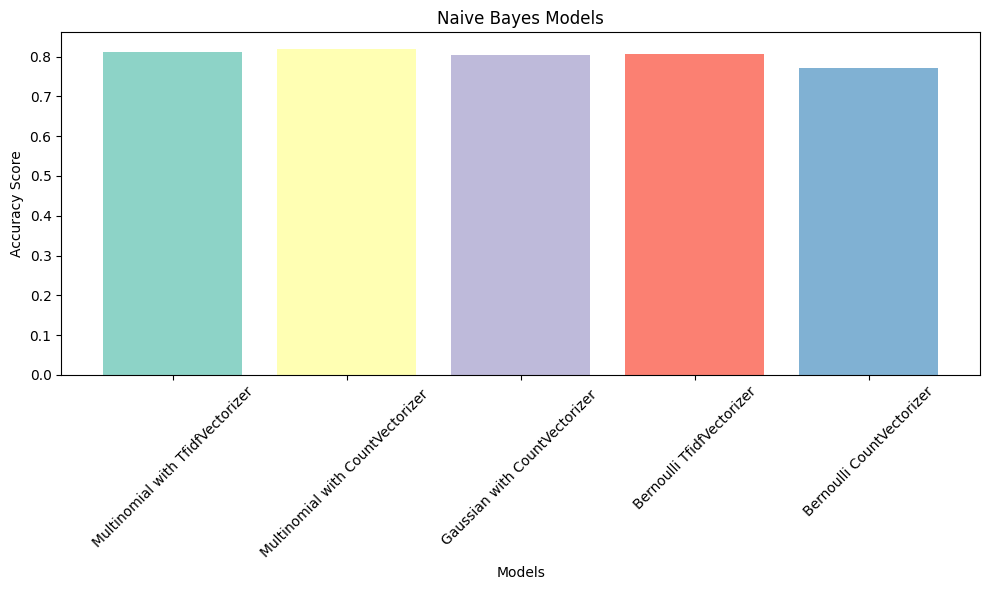

In [199]:
plt.figure(figsize=(10, 6))
plt.bar(my_models, accuracies, color=plt.cm.Set3(np.arange(len(my_models))))
plt.xticks(rotation=45)
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Naive Bayes Models')
plt.tight_layout()
plt.savefig("/Users/nandapop/Documents/Bootcamp/naive_bayes/data/processed/NB_results.png")
plt.show()

Bernoulli here with CountVectorizer shows better for classification with binary features.